# Global Financial Crisis

In this data project we will focus on exploratory data analysis of stock prices.
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

### The Imports

In [1]:
!pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

In [3]:
df = pd.read_pickle('all_banks.csv')

In [4]:
df

Bank Ticker    BAC                                      C                  \
Stock Info    Open   High    Low  Close    Volume    Open    High     Low   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.00  493.80  481.10   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.60  491.00  483.50   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.40  487.80  484.00   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.80  489.00  482.00   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.00  487.40  483.00   
...            ...    ...    ...    ...       ...     ...     ...     ...   
2015-12-24   17.32  17.38  17.22  17.27  29373415   52.48   52.97   52.45   
2015-12-28   17.22  17.23  16.98  17.13  41777497   52.57   52.57   51.96   
2015-12-29   17.25  17.35  17.16  17.28  45670376   52.76   53.22   52.74   
2015-12-30   17.20  17.24  17.04  17.05  35066378   52.84   52.94   52.25   
2015-12-31   17.01  17.07  16.83  16.83  47152968   52.07   52.39   51.75   

Bank Ticker                    ...     MS                                \
Stock Info    Close    Volume  ...   Open   High    Low  Close   Volume   
Date                           ...                                        
2006-01-03   492.90   1537660  ...  57.17  58.49  56.74  58.31  5377000   
2006-01-04   483.80   1871020  ...  58.70  59.28  58.35  58.35  7977800   
2006-01-05   486.20   1143160  ...  58.55  58.59  58.02  58.51  5778000   
2006-01-06   486.20   1370250  ...  58.77  58.85  58.05  58.57  6889800   
2006-01-09   483.90   1680740  ...  58.63  59.29  58.62  59.19  4144500   
...             ...       ...  ...    ...    ...    ...    ...      ...   
2015-12-24    52.71   4671254  ...  32.57  32.71  32.44  32.48  2798163   
2015-12-28    52.38   8761743  ...  32.36  32.36  31.95  32.17  5420280   
2015-12-29    52.98  10155134  ...  32.44  32.70  32.32  32.55  6388244   
2015-12-30    52.30   8763337  ...  32.50  32.64  32.20  32.23  5057162   
2015-12-31    51.75  11281771  ...  31.91  32.30  31.77  31.81  8154307   

Bank Ticker    WFC                                 
Stock Info    Open   High    Low  Close    Volume  
Date                                               
2006-01-03   31.60  31.98  31.20  31.90  11016400  
2006-01-04   31.80  31.82  31.36  31.53  10871000  
2006-01-05   31.50  31.56  31.31  31.50  10158000  
2006-01-06   31.58  31.78  31.38  31.68   8403800  
2006-01-09   31.68  31.82  31.56  31.68   5619600  
...            ...    ...    ...    ...       ...  
2015-12-24   54.97  55.09  54.71  54.82   4999417  
2015-12-28   54.55  54.78  54.17  54.68   8288841  
2015-12-29   55.11  55.35  54.99  55.29   7894876  
2015-12-30   55.27  55.31  54.79  54.89   8016893  
2015-12-31   54.51  54.95  54.22  54.36  10929767  

[2517 rows x 30 columns]

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ['BAC','CG','GS','JPM','MS','WF']

In [6]:
tickers

['BAC', 'CG', 'GS', 'JPM', 'MS', 'WF']

# EDA
What is the max Close price for each bank's stock throughout the time period?

In [7]:
df['BAC']['Close'].max()

54.9

In [8]:
df.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [10]:
a = df['BAC']['Close'].pct_change()
b = df['C']['Close'].pct_change()
c = df['GS']['Close'].pct_change()
d = df['JPM']['Close'].pct_change()
e = df['MS']['Close'].pct_change()
f = df['WFC']['Close'].pct_change()

In [11]:
df['BAC']['Close'].pct_change()

Date
2006-01-03         NaN
2006-01-04   -0.010620
2006-01-05    0.001288
2006-01-06   -0.001501
2006-01-09    0.000644
                ...   
2015-12-24   -0.004037
2015-12-28   -0.008107
2015-12-29    0.008757
2015-12-30   -0.013310
2015-12-31   -0.012903
Name: Close, Length: 2517, dtype: float64

In [12]:
returns = pd.concat([a,b,c,d,e,f],axis=1,keys=tickers)

In [13]:
returns.head()

,BAC,CG,GS,JPM,MS,WF
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [14]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


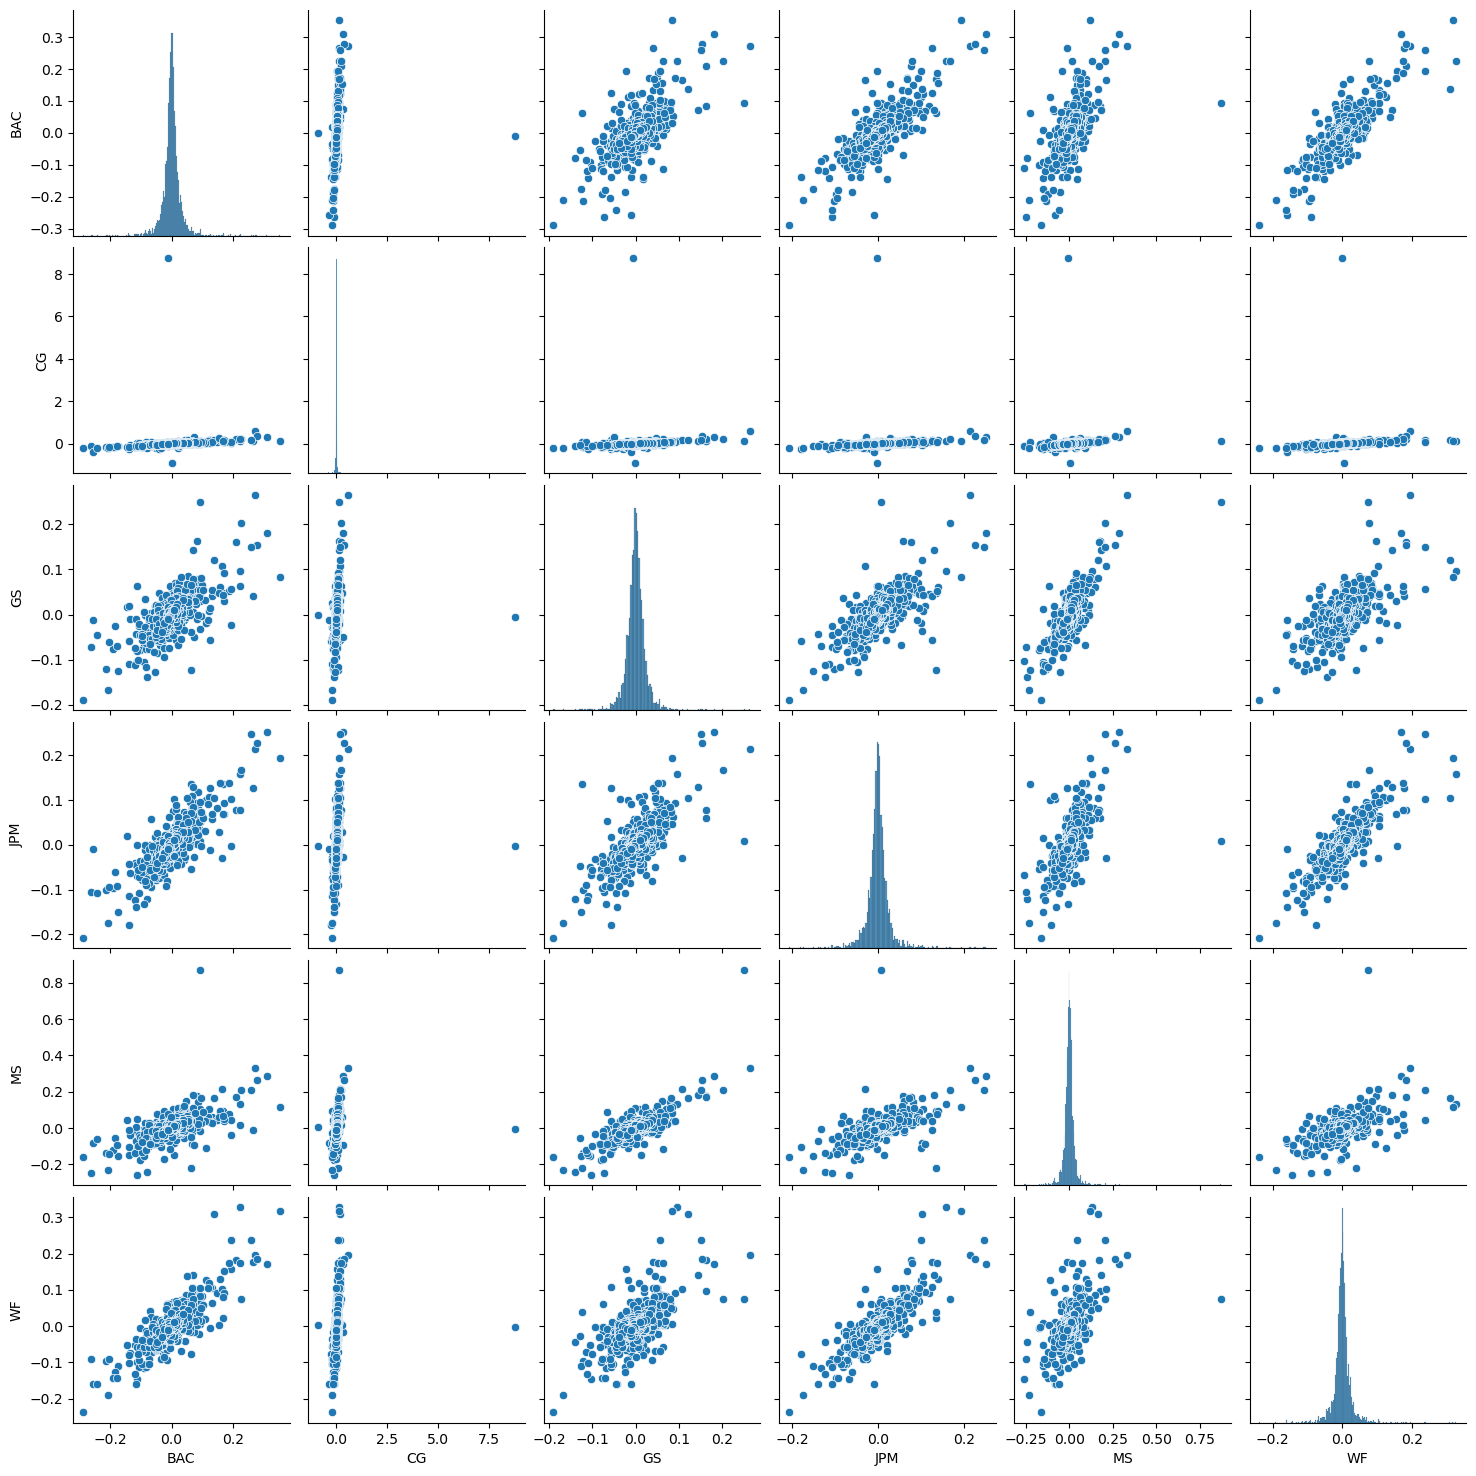

In [15]:
sns.pairplot(returns[1:])

Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [16]:
returns.idxmin()

BAC   2009-01-20
CG    2011-05-06
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WF    2009-01-20
dtype: datetime64[ns]

In [17]:
returns.idxmax()

BAC   2009-04-09
CG    2011-05-09
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WF    2008-07-16
dtype: datetime64[ns]

Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [18]:
returns.std()

BAC    0.036650
CG     0.179969
GS     0.025346
JPM    0.027656
MS     0.037820
WF     0.030233
dtype: float64

In [19]:
returns['2015-01-01':'2015-12-31'].std()

BAC    0.016163
CG     0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WF     0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

In [20]:
returns['2015-01-01':'2015-12-31']['MS']

Date
2015-01-02   -0.002320
2015-01-05   -0.031258
2015-01-06   -0.028800
2015-01-07    0.014278
2015-01-08    0.014889
                ...   
2015-12-24   -0.003681
2015-12-28   -0.009544
2015-12-29    0.011812
2015-12-30   -0.009831
2015-12-31   -0.013031
Name: MS, Length: 252, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS', ylabel='Density'>

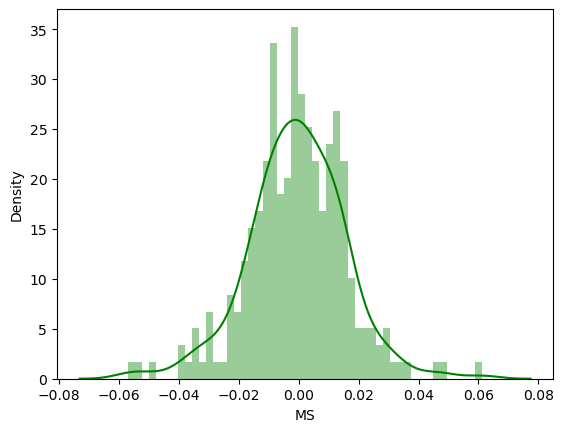

In [21]:
sns.distplot(returns['2015-01-01':'2015-12-31']['MS'],color='green',bins=50)

Create a distplot using seaborn of the 2008 returns for CitiGroup

In [22]:
returns['2008-01-01':'2008-12-31']['CG']

Date
2008-01-02   -0.017663
2008-01-03    0.000346
2008-01-04   -0.023851
2008-01-07    0.000708
2008-01-08   -0.039632
                ...   
2008-12-24    0.039877
2008-12-26   -0.007375
2008-12-29   -0.023774
2008-12-30    0.035008
2008-12-31   -0.013235
Name: CG, Length: 253, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CG', ylabel='Density'>

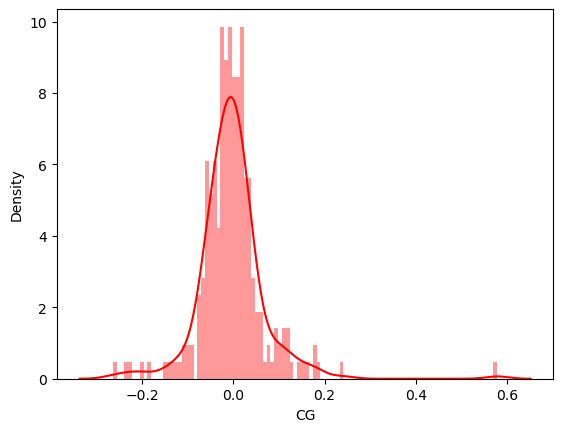

In [23]:
sns.distplot(returns['2008-01-01':'2008-12-31']['CG'],color='red',bins=100)

____
# More Visualization


### Imports

In [24]:
!pip install cufflinks
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

Defaulting to user installation because normal site-packages is not writeable


Create a line plot showing Close price for each bank for the entire index of time.

<AxesSubplot:xlabel='Date'>

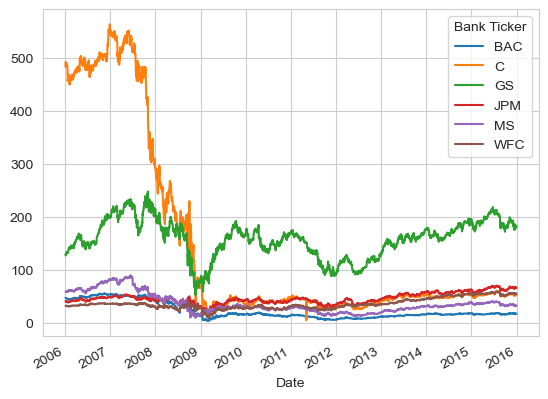

In [25]:
df.xs(key='Close',axis=1,level='Stock Info').plot()

In [26]:
df.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008.

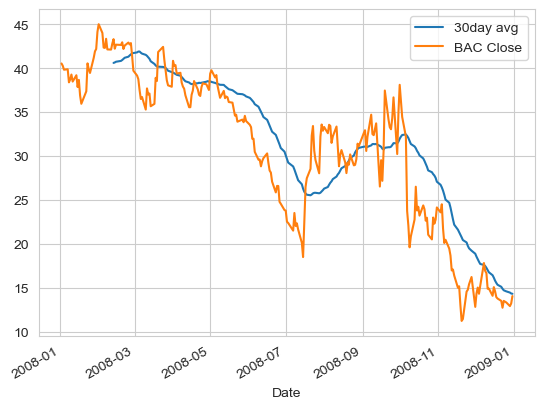

In [27]:
df['2008-01-01':'2009-01-01']['BAC']['Close'].rolling(window=30).mean().plot(label='30day avg')
df['2008-01-01':'2009-01-01']['BAC']['Close'].plot(label='BAC Close')
plt.legend()

Create a heatmap of the correlation between the stocks Close Price.

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

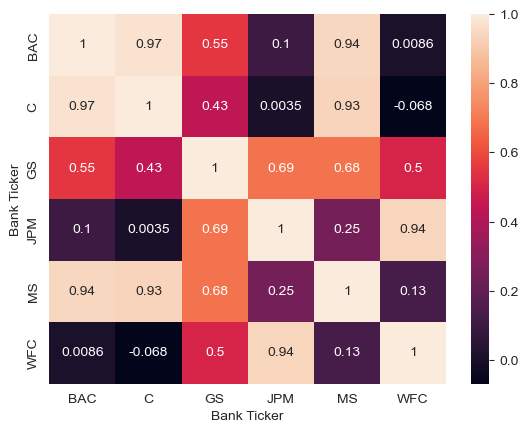

In [28]:
sns.heatmap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Use seaborn's clustermap to cluster the correlations together:

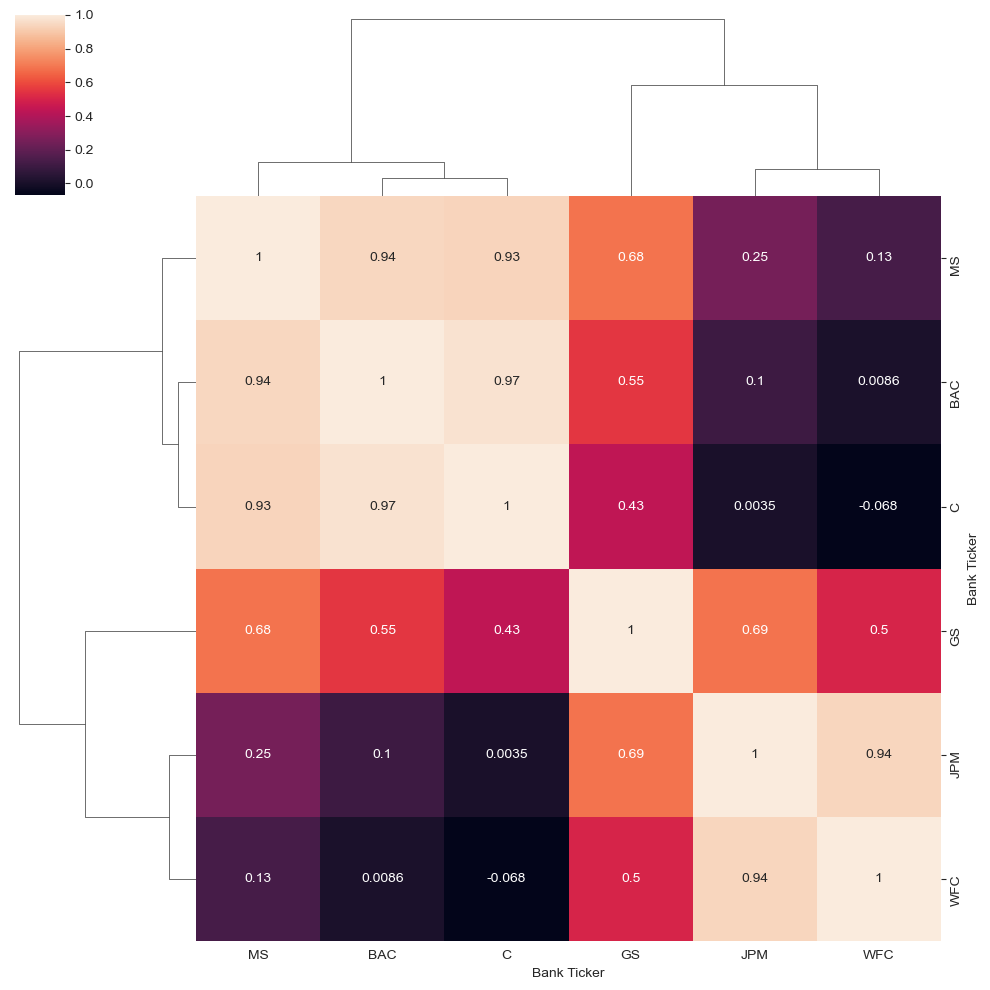

In [29]:
sns.clustermap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Thank You